<a href="https://colab.research.google.com/github/albaraa-prog/MaskNoMask/blob/main/MaskNoMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The Dataset is in my Google Drive, therefore I will import it.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
# Set the path for the dataset
train_dir = '/content/drive/MyDrive/Dataset'
test_dir = '/content/drive/MyDrive/Test'

In [5]:
# Making sure all dataset are imported to the project
import os
print(len(os.listdir('/content/drive/MyDrive/Dataset/with_mask')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/without_mask')))
print(len(os.listdir('/content/drive/MyDrive/Test/with_mask')))
print(len(os.listdir('/content/drive/MyDrive/Test/without_mask')))

300
300
100
100


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=100,
    class_mode='binary',  # 'binary' for binary classification (Mask vs. No Mask)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [11]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 184s 25s/step - accuracy: 0.5110 - loss: 1.1459 - val_accuracy: 0.7417 - val_loss: 0.4886
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 16s/step - accuracy: 0.8265 - loss: 0.4054 - val_accuracy: 0.9083 - val_loss: 0.2227
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 16s/step - accuracy: 0.8772 - loss: 0.2939 - val_accuracy: 0.9417 - val_loss: 0.1398
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 16s/step - accuracy: 0.9320 - loss: 0.2049 - val_accuracy: 0.9333 - val_loss: 0.1778
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 16s/step - accuracy: 0.9404 - loss: 0.1525 - val_accuracy: 0.9417 - val_loss: 0.1299
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 85s 17s/step - accuracy: 0.9744 - loss: 0.0865 - val_accuracy: 0.9250 - val_loss: 0.2318
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 157s 21s/step - accuracy: 0.9687 - loss: 0.1113 - val_accuracy: 0.9333 - val_loss: 0.1706
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 16s/step - accuracy: 0.9725 - loss: 0.0565 - val_accuracy: 0.9333 - val_loss: 0.2118
Epoch 9/2

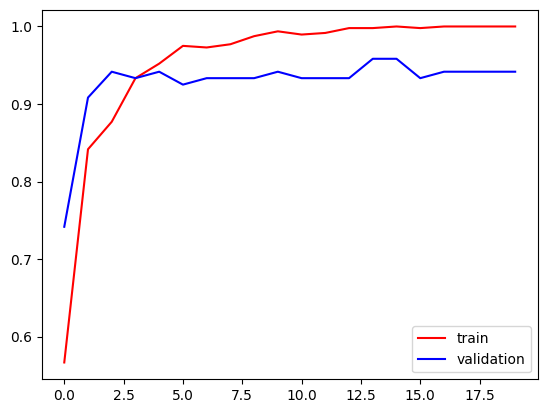

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

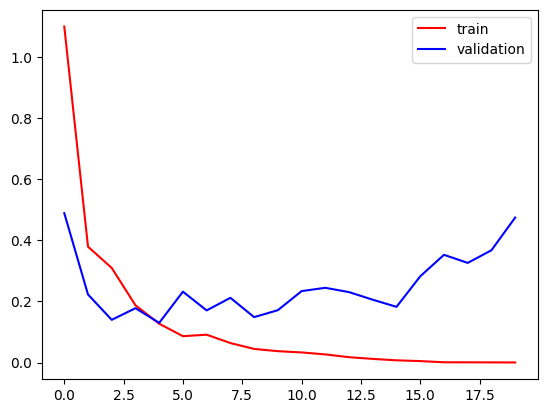

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# Test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,  # Separate directory for testing images
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
)


Found 200 images belonging to 2 classes.


In [16]:
#predict the test data
predictions = model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[47 53]
 [46 54]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       100
           1       0.50      0.54      0.52       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 141s 25s/step - accuracy: 0.7495 - loss: 2.3086 - val_accuracy: 0.8417 - val_loss: 0.5006
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 136s 26s/step - accuracy: 0.9451 - loss: 0.7902 - val_accuracy: 0.8083 - val_loss: 0.7957
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 136s 25s/step - accuracy: 0.9673 - loss: 0.3024 - val_accuracy: 0.5167 - val_loss: 2.5480
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 129s 25s/step - accuracy: 0.9675 - loss: 0.3705 - val_accuracy: 0.7333 - val_loss: 1.3208
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 129s 26s/step - accuracy: 0.9832 - loss: 0.1887 - val_accuracy: 0.8250 - val_loss: 0.8490
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 128s 25s/step - accuracy: 0.9885 - loss: 0.0596 - val_accuracy: 0.8333 - val_loss: 0.9155
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 129s 26s/step - accuracy: 0.9737 - loss: 0.4457 - val_accuracy: 0.8000 - val_loss: 1.2400
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 136s 27s/step - accuracy: 0.9936 - loss: 0.0602 - val_accuracy: 0.8083 - val_loss:

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[47 53]
 [46 54]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       100
           1       0.50      0.54      0.52       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



### **Using Pre-trained model - Resnet**

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [27]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 174s 33s/step - accuracy: 0.4664 - loss: 3.9944 - val_accuracy: 0.5000 - val_loss: 4.0757
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 200s 33s/step - accuracy: 0.4277 - loss: 3.5561 - val_accuracy: 0.5000 - val_loss: 2.4129
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 209s 35s/step - accuracy: 0.5096 - loss: 1.7135 - val_accuracy: 0.5000 - val_loss: 1.0356
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 202s 35s/step - accuracy: 0.5454 - loss: 0.9073 - val_accuracy: 0.5000 - val_loss: 0.6881
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 201s 37s/step - accuracy: 0.5287 - loss: 0.8536 - val_accuracy: 0.5167 - val_loss: 1.1031
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 159s 33s/step - accuracy: 0.4981 - loss: 0.9007 - val_accuracy: 0.6917 - val_loss: 0.6004
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 169s 35s/step - accuracy: 0.5811 - loss: 0.7022 - val_accuracy: 0.5000 - val_loss: 0.8082
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 193s 32s/step - accuracy: 0.5431 - loss: 0.7482 - val_accuracy: 0.6250 - val_loss:

In [29]:
predictions = resnet_model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 8s/step


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[63 37]
 [64 36]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       100
           1       0.49      0.36      0.42       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

